# 1 - Perkenalan
  Name : Jason Rich Darmawan Onggo Putra
  Batch : 016 RMT

  Datasete overview:

  Project objective:

# 2 - Import Libraries

In [55]:
# Data Loading
import pandas as pd

# Exploratory Data Analysis (EDA)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

# Model Defnition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation
from sklearn.metrics import recall_score, precision_score, f1_score

# Model Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, PrecisionRecallDisplay, precision_recall_curve

# Model Saving
import joblib
import json

# 3 - Data Loading

- drop unrelated columns:
  - 'CLIENTNUM'
  - 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
  - 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

In [2]:
# preview data set
df = pd.read_csv("./deployment/BankChurners.csv")
with pd.option_context("display.max_columns", None):
    display(df)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...     

In [3]:
# drop unrelated columns
df.drop(labels=[
    "CLIENTNUM",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
    "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"
], axis=1, inplace=True, errors='ignore')

In [4]:
# Check 'Gender' Cardinality
print(df['Gender'].value_counts())

# Define the categories in order (for better readibility)
gen = ['F', 'M']

F    5358
M    4769
Name: Gender, dtype: int64


In [5]:
# Check 'Education_Level' Cardinality
print(df['Education_Level'].value_counts())

# Define the categories
edu_lev = ['Unknown', 'Graduate','High School','Uneducated','College','Post-Graduate',
           'Doctorate']

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64


In [6]:
# Check 'Marital_Status' Cardinality
print(df['Marital_Status'].value_counts())

# Define the categories in order (for better readibility)
mar_sta = ['Unknown', 'Single', 'Married', 'Divorced']

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: Marital_Status, dtype: int64


In [7]:
# Check 'Income_Category' Cardinality
print(df['Income_Category'].value_counts())

# Define the categories in order (for better readibility)
inc_cat = ['Unknown', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K',
           '$120K +']

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64


In [8]:
# Check 'Card_Category' Cardinality
print(df['Card_Category'].value_counts())

# Define the categories in order (for better readibility)
card_cat = ['Blue', 'Silver', 'Gold', 'Platinum']

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64


## 3.1 - Imbalanced Data Set

- Moderately imbalanced data set.

  Proportion of the minority class is 16%

  [reference](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data)

In [9]:
# Check cardinality
print(df['Attrition_Flag'].value_counts())

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64


In [10]:
# Define the categories in order (for better readibility)
att_fla = ['Existing Customer', 'Attrited Customer']

In [11]:
# Check proportion of the minority class.
"%.2f%%" % (1627 / (8500 + 1627) * 100)

'16.07%'

- 'Education_Level', 'Income_Category' are nominal because it have significant 'Unknown' value. Therefore, it can't be ordinal.

  [reference](https://stats.stackexchange.com/questions/596675/is-high-school-graduate-unknown-ordinal-or-nominal-data?noredirect=1#comment1104419_596675)

In [12]:
# Define features and target
num_fea = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 
    'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
    'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 
    'Avg_Utilization_Ratio', 
]
ord_fea = ['Card_Category']
nom_fea = [
    'Gender', 'Education_Level', 'Marital_Status', 'Income_Category',
]
target = 'Attrition_Flag'

In [13]:
# Check missing values
df.isna().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

# 4 - Exploratory Data Analysis (EDA)

- Categorical features are moderately imbalanced columns.

In [14]:
# Check Central Tendency
def isolate():
    cat_fea = np.concatenate([ord_fea, nom_fea], axis=0)

    with pd.option_context("float.format", "{:,.2f}".format):
        display(df[num_fea].agg(['min', 'max']))
        display(df[cat_fea].describe())
isolate()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
min            26                0              13                         1   
max            73                5              56                         6   

     Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
min                       0                      0      1,438.30   
max                       6                      6     34,516.00   

     Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
min                    0             3.00                  0.00   
max                 2517        34,516.00                  3.40   

     Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
min              510              10                 0.00   
max            18484             139                 3.71   

     Avg_Utilization_Ratio  
min                   0.00  
max                   1.00

Card_Category Gender Education_Level Marital_Status Income_Category
count          10127  10127           10127          10127           10127
unique             4      2               7              4               6
top             Blue      F        Graduate        Married  Less than $40K
freq            9436   5358            3128           4687            3561

## 4.1 - Log Transforma and Square Root Transform

- 'Months_Inactive_12_mon', 'Avg_Utilization_Ratio' is moderately skewed to the right.
- 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1' is highly skewed to the right.

[reference](https://docs.oracle.com/cd/E57185_01/CBREG/ch03s02s03s01.html)

In [15]:
# Check Skewness
df[num_fea].agg(['mean', 'std', 'skew'])

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
mean     46.325960         2.346203       35.928409                  3.812580   
std       8.016814         1.298908        7.986416                  1.554408   
skew     -0.033605        -0.020826       -0.106565                 -0.162452   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
mean                2.341167               2.455317   8631.953698   
std                 1.010622               1.106225   9088.776650   
skew                0.633061               0.011006      1.666726   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
mean          1162.814061      7469.139637              0.759941   
std            814.987335      9090.685324              0.219207   
skew            -0.148837         1.661697              1.732063   

      Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
mean      4404.086304       64.858695             0.712222   
std       3397.129254       23.472570             0.238086   
skew         2.041003        0.153673             2.064031   

      Avg_Utilization_Ratio  
mean               0.274894  
std                0.275691  
skew               0.718008

- Skewed can be addressed with Log Transform for columns 'Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt'
- Skewed can be addressed with Square Root Transform for columns 'Months_Inactive_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'

[reference](https://towardsdatascience.com/top-3-methods-for-handling-skewed-data-1334e0debf45)

In [16]:
# Attempt to address skewed data
display(
    "log10",
    np.log10(
        df[[
            'Months_Inactive_12_mon', 'Credit_Limit', 'Avg_Open_To_Buy',
            'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio'
           ]] + 10**-10
    )
      .agg(['mean', 'std', 'skew'])
)

display(
    "sqrt",
    np.sqrt(
        df[['Months_Inactive_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']]
    )
      .agg(['mean', 'std', 'skew'])
)

'log10'

Months_Inactive_12_mon  Credit_Limit  Avg_Open_To_Buy  \
mean                0.297797      3.736414         3.545507   
std                 0.587459      0.405531         0.569540   
skew              -15.428964      0.457081        -0.100132   

      Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Ct_Chng_Q4_Q1  \
mean             -0.140757         3.545934            -0.177323   
std               0.251735         0.284226             0.298131   
skew            -29.778244         0.262210           -24.852314   

      Avg_Utilization_Ratio  
mean              -2.892698  
std                4.053518  
skew              -1.164905

'sqrt'

Months_Inactive_12_mon  Total_Amt_Chng_Q4_Q1  Total_Ct_Chng_Q4_Q1  \
mean                1.491821              0.863211             0.832696   
std                 0.340071              0.121694             0.137267   
skew               -0.177745              0.389287             0.224686   

      Avg_Utilization_Ratio  
mean               0.420923  
std                0.312613  
skew               0.003291

In [17]:
# Define variable for data preprocessing
num_log = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Trans_Amt']
num_sqrt = ['Months_Inactive_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1',
            'Avg_Utilization_Ratio']
num_sta = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
           'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct']
nom_unk = ['Education_Level', 'Income_Category']
nom_mod = ['Gender', 'Marital_Status']

> [Now this is a assumption in Statistics that each data point X has its own independent associated error, i.e., the errors are independent from one another, which helps us assume they occur randomly.](https://qr.ae/pv0hBM)

> [The variable that is supposed to be normally distributed is just the prediction error. What is a prediction error? It is the deviation of the model prediction results from the real results.](https://towardsdatascience.com/is-normal-distribution-necessary-in-regression-how-to-track-and-fix-it-494105bc50dd)

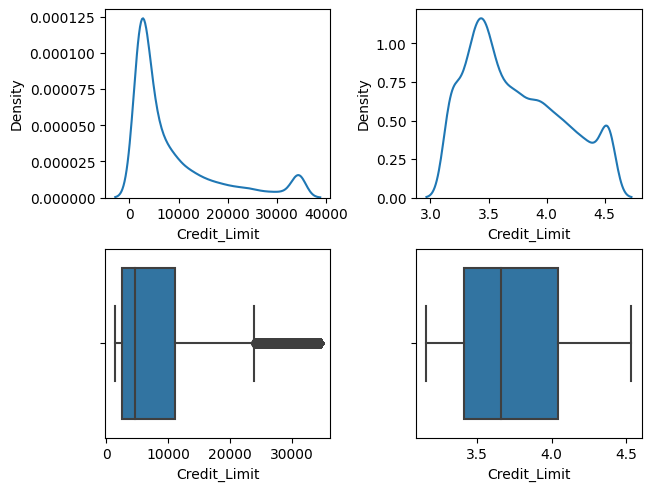

In [18]:
# KDE
def isolate():
    fig, axes = plt.subplots(2,2, layout="constrained")
    sns.kdeplot(x=df['Credit_Limit'], ax=axes[0][0])

    sns.kdeplot(x=np.log10(df['Credit_Limit'] + 10**-10), ax=axes[0][1])

    sns.boxplot(x=df['Credit_Limit'], ax=axes[1][0])

    sns.boxplot(x=np.log10(df['Credit_Limit'] + 10**-10), ax=axes[1][1])

isolate()

## 4.2 - X and y Relationship

- The problem of imbalanced dataset.

  In `axes[0]`, Blue seems more likely to be 'Customer Attried'. However, `axes[1]` to `axes[4]` shows that 'Blue' have the same proportion similar to 'Silver', 'Gold', 'Platinum'.

  This happened because we have imbalanced dataset. If we were to do stratified sampling, the graph will drastically change.

  Therefore, we will do EDA based on stratified sampling.

More likely to be 'Attrited Customer'
- 'Card_Category' -> 'Gold'
- 'Gender' -> 'Female'
- 'Education_Level' -> 'Graduate'
- 'Marital_Status' -> 'Married'
- 'Income_Category' -> 'Less than $40k'

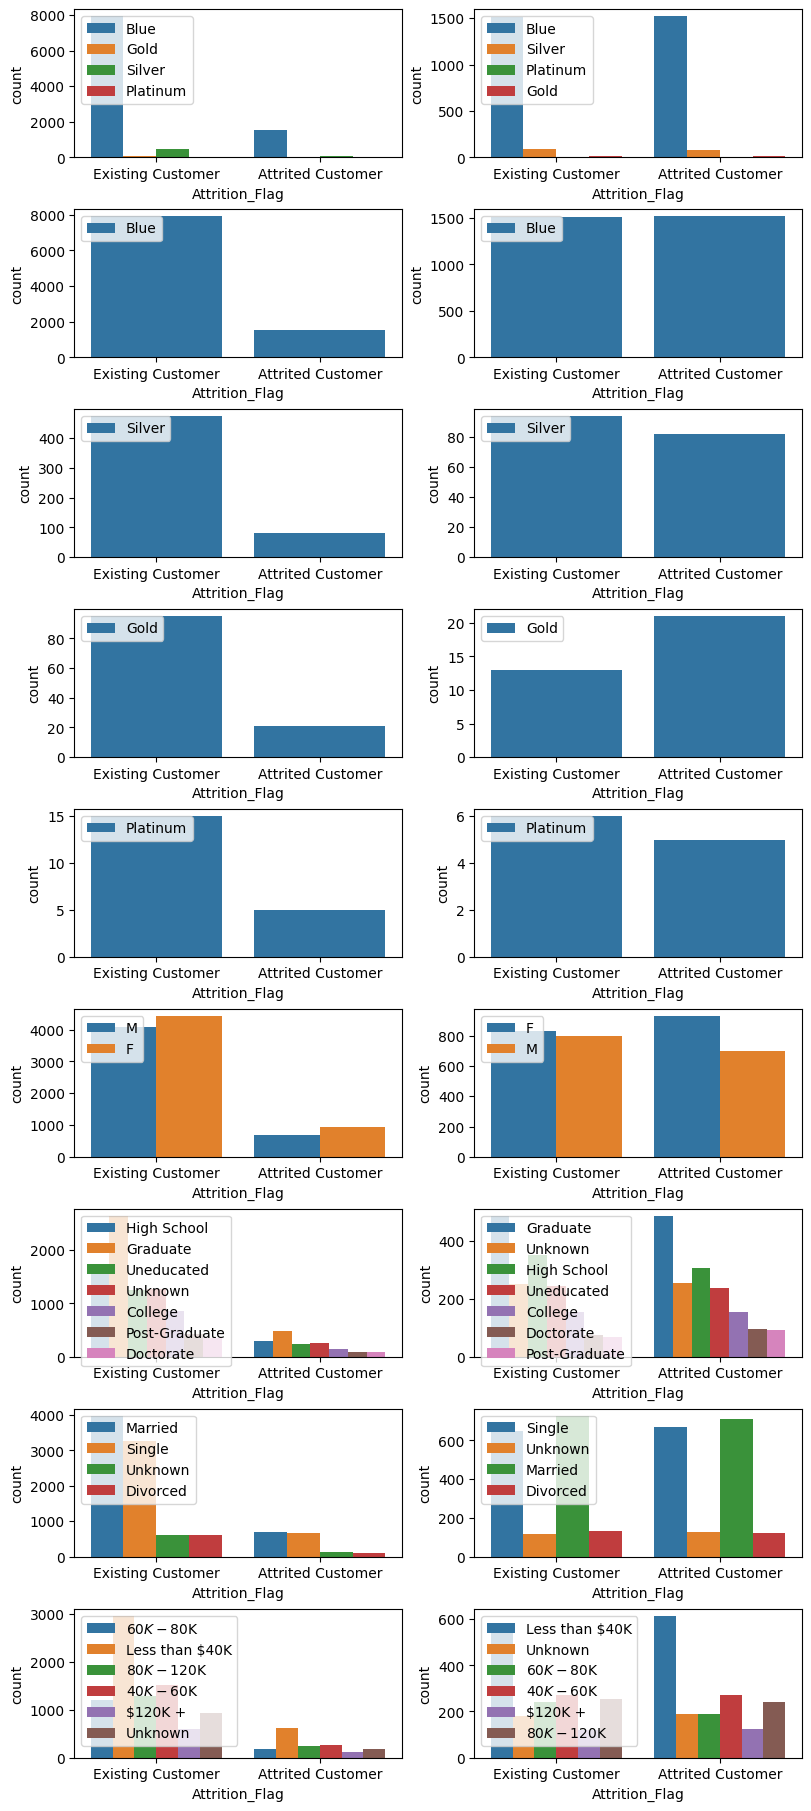

In [19]:
# Check if one nominal category have larger proportion of 'Attried Customer'
def isolate():
    balanced = df.groupby(by=target, axis=0).sample(1627, random_state=17) \
                 .sort_values(by=target, ascending=False)
    
    fig, axes = plt.subplots(9,2, layout="constrained", figsize=(8,18))

    sns.countplot(data=df, hue='Card_Category', x=target, ax=axes[0][0])
    sns.countplot(data=balanced, hue='Card_Category', x=target, ax=axes[0][1])

    sns.countplot(data=df.loc[df['Card_Category'] == 'Blue'],
        hue="Card_Category", x=target, ax=axes[1][0])
    sns.countplot(data=balanced.loc[balanced['Card_Category'] == 'Blue'],
        hue="Card_Category", x=target, ax=axes[1][1])

    sns.countplot(data=df.loc[df['Card_Category'] == 'Silver'],
        hue="Card_Category", x=target, ax=axes[2][0])
    sns.countplot(data=balanced.loc[balanced['Card_Category'] == 'Silver'],
        hue="Card_Category", x=target, ax=axes[2][1])

    sns.countplot(data=df.loc[df['Card_Category'] == 'Gold'], 
        hue='Card_Category', x=target, ax=axes[3][0])
    sns.countplot(data=balanced.loc[balanced['Card_Category'] == 'Gold'], 
        hue='Card_Category', x=target, ax=axes[3][1])

    sns.countplot(data=df.loc[df['Card_Category'] == 'Platinum'], 
        hue='Card_Category', x=target, ax=axes[4][0])
    sns.countplot(data=balanced.loc[balanced['Card_Category'] == 'Platinum'], 
        hue='Card_Category', x=target, ax=axes[4][1])

    sns.countplot(data=df, hue='Gender', x=target, ax=axes[5][0])
    sns.countplot(data=balanced, hue='Gender', x=target, ax=axes[5][1])

    sns.countplot(data=df, hue='Education_Level', x=target, ax=axes[6][0])
    sns.countplot(data=balanced, hue='Education_Level', x=target, ax=axes[6][1])

    sns.countplot(data=df, hue='Marital_Status', x=target, ax=axes[7][0])
    sns.countplot(data=balanced, hue='Marital_Status', x=target, ax=axes[7][1])

    sns.countplot(data=df, hue='Income_Category', x=target, ax=axes[8][0])
    sns.countplot(data=balanced, hue='Income_Category', x=target, ax=axes[8][1])

    for ax in axes.ravel():
        ax.legend(loc='upper left')

isolate()

- In 2-axis, the higher values of these columns, the more likely to be an 'Existing Customer'
  - 'Total_Amt_Chng_Q4_Q1'
  - 'Total_Trans_Amt'
  - 'Total_Trans_Ct'
  - 'Contacts_Count_12_mon'

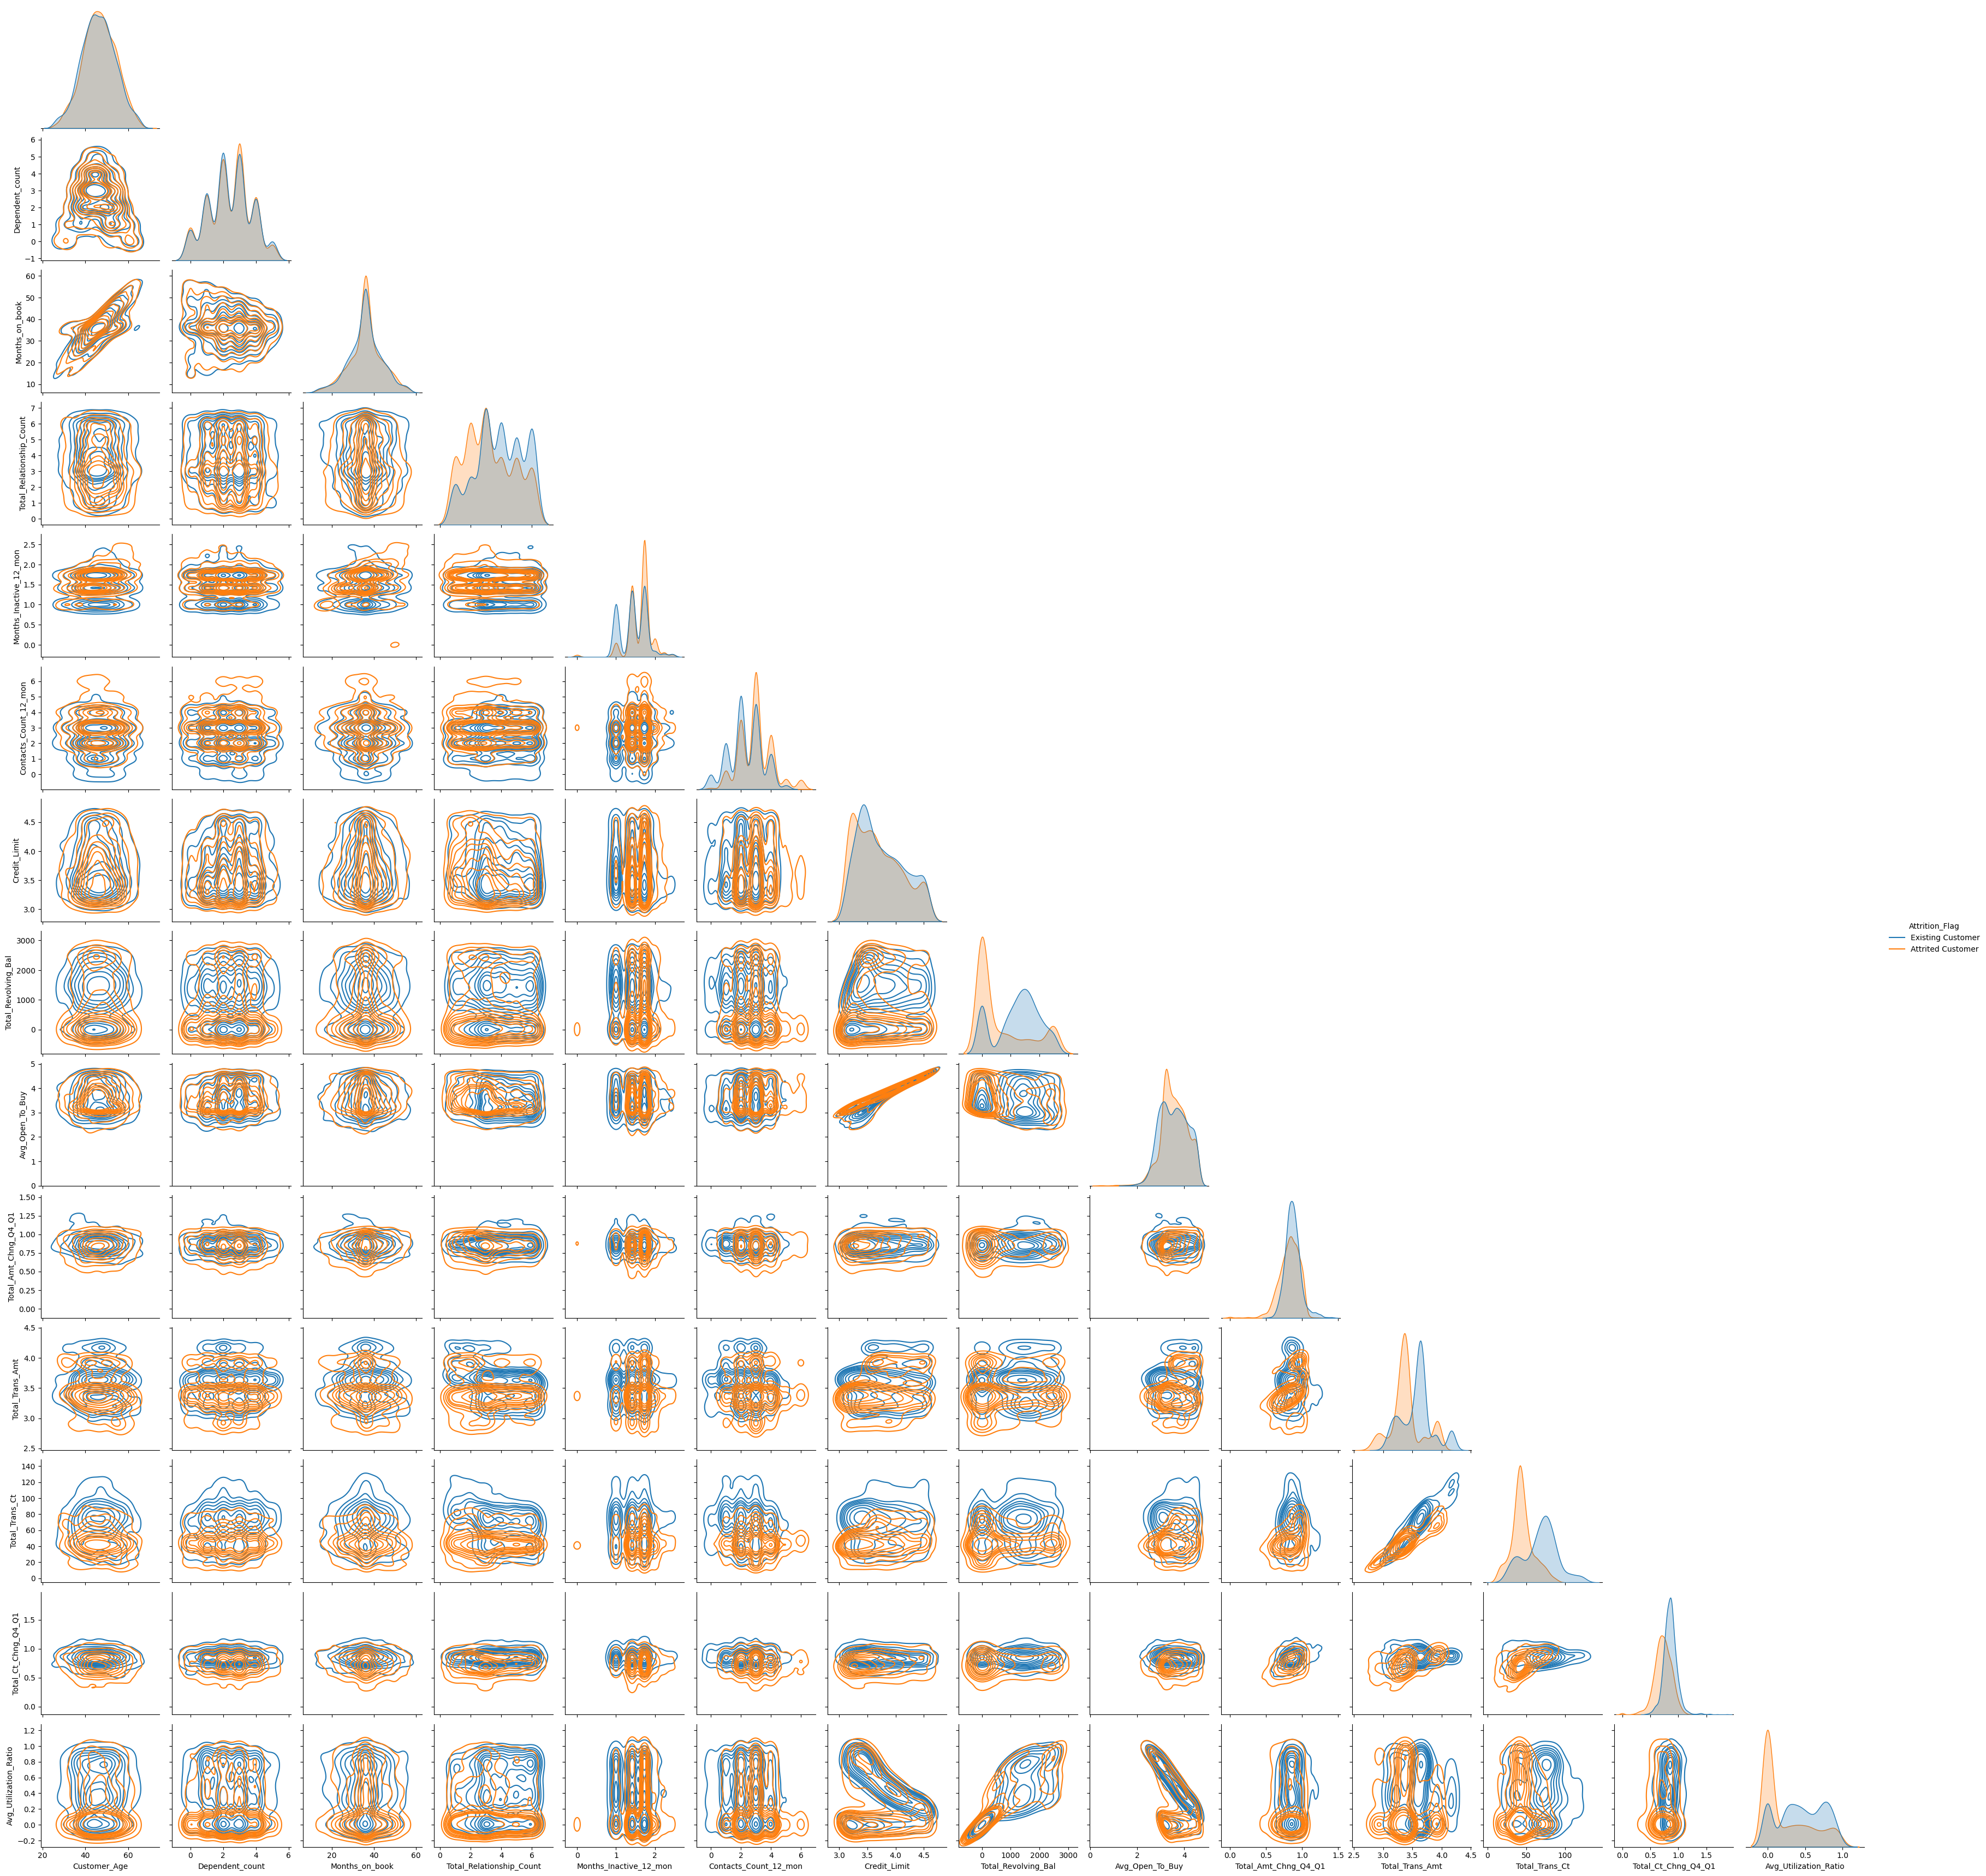

In [57]:
# Check if X numerical have larger proportion of 'Attried Customer'
# reference: https://stackoverflow.com/questions/37612434/what-are-ways-to-speed-up-seaborns-pairplot
def isolate():
    balanced = df.groupby(by=target, axis=0).sample(1627, random_state=17) \
                 .sort_values(by=target, ascending=False)

    df_num_log = np.log10(balanced[num_log] + 10**-10)
    df_num_sqrt = np.sqrt(balanced[num_sqrt])
    balanced[num_log] = df_num_log
    balanced[num_sqrt] = df_num_sqrt

    columns = np.concatenate([num_fea, [target]], axis=0)
    g = sns.pairplot(data=balanced[columns], hue=target, kind="kde", corner=True)
    g.savefig("./deployment/pairplot.png")
    plt.clf()

# isolate()
Image(filename="./deployment/pairplot.png")

# 5 - Data Preprocessing

In [21]:
# Sample Inference Set
inf_set = df.groupby(by=target, axis=0).sample(n=20, random_state=17)

# Drop Inference Set from Train and Test Set
df_train_test = df.drop(inf_set.index)

# Split Data Set to X nd y
X = df_train_test.drop([target], axis=1)
y = df_train_test[target]

# Split Data Set to Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

In [22]:
# Define pipeline.
num_sta_tran = Pipeline(steps=[
    # strategy='median' because if the data is normally distributed
    # it is assumed that mean=median.
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

def log10(x):
    return np.log10(x + 10**-10)

num_log_tran = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('log', FunctionTransformer(func=np.log1p)),
    # although Log Transformation transform the data to be more normally distributed
    # it does not remove outliers.
    ('scaler', RobustScaler())
])

num_sqrt_tran = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('sqrt', FunctionTransformer(func=np.sqrt)),
    ('scaler', RobustScaler())
])

# For Feature Selection
num_composer = ColumnTransformer(transformers=[
    ('num_sta_tran', num_sta_tran, num_sta),
    ('num_log_tran', num_log_tran, num_log),
    ('num_sqrt_tran', num_sqrt_tran, num_sqrt),
])

nom_unk_tran = Pipeline(steps=[
    # We assume that a customer may refuse to share
    # 'Education_Level' and 'Income_Category'
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder(categories=[
        edu_lev,
        inc_cat
    ]))
])

nom_mod_tran = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(categories=[
        gen,
        mar_sta
    ]))
])

ord_tran = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(categories=[
        card_cat
    ]))
])

# For feature selection
ord_composer = ColumnTransformer(transformers=[
    ('ord_tran', ord_tran, ord_fea)
])

- Drop feature that have strong correlation between features.
  - 'Customer_Age', 'Avg_Utilization_Ratio', 'Avg_Open_To_Buy', 'Total_Trans_Amt'

In [23]:
# Check numerical features correlation
def isolate():
    X_scaled = num_composer.fit_transform(X=X_train)

    X_encoded = ord_composer.fit_transform(X=X_train)

    columns = np.concatenate([num_sta, num_log, num_sqrt, ord_fea], axis=0)

    X_merged = np.concatenate([X_scaled, X_encoded], axis=1)

    X_merged_df = pd.DataFrame(data=X_merged, columns=columns)

    X_merged_df.drop(['Customer_Age', 'Avg_Utilization_Ratio',
                      'Total_Trans_Amt', 'Avg_Open_To_Buy'], axis=1, inplace=True)

    display(X_merged_df.corr(method="spearman").style.background_gradient(cmap="coolwarm"))

    y_encoded = y_train.map({'Existing Customer': 0, 'Attrited Customer':1})
    Xy_df = X_merged_df.copy()
    Xy_df[target] = y_encoded

    display(Xy_df.corr(method="kendall")[[target]].T.style.background_gradient(cmap="coolwarm"))

isolate()

In [24]:
# Check numerical features VIF
def isolate():
    X_scaled = num_composer.fit_transform(X=X_train)

    X_encoded = ord_composer.fit_transform(X=X_train)

    columns = np.concatenate([num_sta, num_log, num_sqrt, ord_fea], axis=0)

    X_merged = np.concatenate([X_scaled, X_encoded], axis=1)

    X_merged_df = pd.DataFrame(data=X_merged, columns=columns)

    X_merged_df.drop(['Avg_Open_To_Buy', 'Total_Trans_Amt', 'Avg_Utilization_Ratio',
                      'Customer_Age'], axis=1, inplace=True)

    vif_data = pd.DataFrame()
    vif_data['Feature'] = X_merged_df.columns
    vif_data['VIF'] = [variance_inflation_factor(X_merged_df.values, i)
                       for i in range(len(X_merged_df.columns))]
    
    display(vif_data.style.background_gradient(cmap="coolwarm"))

isolate()

In [25]:
# Define numerical features after feature selection
num_sta_new = ['Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
               'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Ct']
num_log_new = ['Credit_Limit']
num_sqrt_new = ['Months_Inactive_12_mon', 'Total_Amt_Chng_Q4_Q1', 
                'Total_Ct_Chng_Q4_Q1']

- Drop feature that have strong correlation between features
  - 'Income_Category'

In [26]:
# Check nominal features correlation
def isolate():
    for i in range(len(nom_fea)):
        for j in range(len(nom_fea)):
            if i == j or i > j:
                continue

            print(f'{nom_fea[i]} - {nom_fea[j]}')
            crosstab = pd.crosstab(X_train[nom_fea[i]],
                                   X_train[nom_fea[j]])
            chi2, p, dof, _ = stats.chi2_contingency(observed=crosstab)
            cv = stats.chi2.ppf(q=0.95, df=dof)
            print(f'chi2: {chi2:.2f} {chi2 > cv}; p: {p < 0.05}')
    
    for k in range(len(nom_fea)):
        print(f'{nom_fea[k]} - {target}')
        crosstab = pd.crosstab(X_train[nom_fea[k]], y_train)
        chi2, p, dof, _ = stats.chi2_contingency(observed=crosstab)
        cv = stats.chi2.ppf(q=0.95, df=dof)
        print(f'chi2: {chi2:.2f} {chi2 > cv}; p: {p < 0.05}')

isolate()

Gender - Education_Level
chi2: 5.14 False; p: False
Gender - Marital_Status
chi2: 5.18 False; p: False
Gender - Income_Category
chi2: 5674.29 True; p: True
Education_Level - Marital_Status
chi2: 17.99 False; p: False
Education_Level - Income_Category
chi2: 38.02 False; p: False
Marital_Status - Income_Category
chi2: 15.20 False; p: False
Gender - Attrition_Flag
chi2: 10.96 True; p: True
Education_Level - Attrition_Flag
chi2: 14.52 True; p: True
Marital_Status - Attrition_Flag
chi2: 5.23 False; p: False
Income_Category - Attrition_Flag
chi2: 10.07 False; p: False


In [27]:
# Define new nominal features after feature selection
nom_unk_new = ['Education_Level']

nom_unk_tran_new = Pipeline(steps=[
    # We assume that a customer may refuse to share
    # 'Education_Level' and 'Income_Category'
    ('imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),
    ('encoder', OneHotEncoder(categories=[
        edu_lev,
    ]))
])

In [28]:
# Define composer
composer = ColumnTransformer(transformers=[
    ('num_sta_tran', num_sta_tran, num_sta_new),
    ('num_log_tran', num_log_tran, num_log_new),
    ('num_sqrt_tran', num_sqrt_tran, num_sqrt_new),
    ('nom_unk_tran', nom_unk_tran_new, nom_unk_new),
    ('nom_mod_tran', nom_mod_tran, nom_mod),
    ('ord_tran', ord_tran, ord_fea)
])

In [29]:
num_sta_new, num_log_new, num_sqrt_new, nom_unk_new, nom_mod, ord_fea

(['Dependent_count',
  'Months_on_book',
  'Total_Relationship_Count',
  'Contacts_Count_12_mon',
  'Total_Revolving_Bal',
  'Total_Trans_Ct'],
 ['Credit_Limit'],
 ['Months_Inactive_12_mon', 'Total_Amt_Chng_Q4_Q1', 'Total_Ct_Chng_Q4_Q1'],
 ['Education_Level'],
 ['Gender', 'Marital_Status'],
 ['Card_Category'])

# 6 - Model Definition

The data set is a non linear problem. Therefore, we can't use linear algorithm except Logistic Regression.

1. `sklearn.linear_model.LogisticRegression` is used because of its simplicity `p = 1 / 1 + e^(-(b0 +b1x1))`, which translates to lower computational cost.
2. `sklearn.svm.SVC` is used because of its ability to use `kernel='rbf'`. Radial basis function can leverage infinite dimension. In this case, we have several nominal features that was encoded with One Hot Encoder.
3. `sklearn.tree.DecisionTreeClassifier` is used because this is a non-linear problem. None of the numerical features in a 2-axis can be separated 100% just by a line.
4. `sklearn.ensemble.RandomForestClassifier` is used because Decision Tree weakness is inaccuracy / overfitting (train set metrics are very good, but test set metrics are very poor). Random Forest creates multiple Decision Tree to vote and it can improve the result.

In [30]:
# Logistic Regrerssion
log_pipe = Pipeline(steps=[
    ('composer', composer),
    ('clf', LogisticRegression())
])

# SVC
svc_pipe = Pipeline(steps=[
    ('composer', composer),
    ('clf', SVC())
])

# Decision Tree Classifier
dtree_pipe = Pipeline(steps=[
    ('composer', composer),
    ('clf', DecisionTreeClassifier(random_state=17))
])

# Random Forest Classifier
rf_pipe = Pipeline(steps=[
    ('composer', composer),
    ('clf', RandomForestClassifier(random_state=17))
])

# 7 - Model Training

In [31]:
# Model Training
log_pipe.fit(X=X_train, y=y_train)
svc_pipe.fit(X=X_train, y=y_train)
dtree_pipe.fit(X=X_train, y=y_train)
rf_pipe.fit(X=X_train, y=y_train)

print("done")

done


# 8 - Model Evaluation

The data set is imbalanced.
1. F1 Weighted Score is not appropriate. It will give more weight to the majority class.
2. F1 Macro Score is appropriate but the focus is whether this model can recall and precision 'Attried Customer', we don't care if the model can't recall and precision 'Existing Customer'. But, logically, if we have high recall and precision 'Attried Customer', we should have high recall and precision 'Existing Customer'
3. Recall is appropriate. But, recall score can be high if the model label everything as 'Attried Customer'.
4. Precision is approriate. But, precision score can be high if the model only label something as 'Attried Customer' if it is really sure. This makes the recall score very low.

Therefore, we will use F1 Binary Score.

- The results show that Random Forest Classifier have the highest F1 Binary Score.

In [32]:
# Compare metrics of default algorithm.
def isolate():
    results = pd.DataFrame()

    for pipe in [log_pipe, svc_pipe, dtree_pipe, rf_pipe]:
        y_train_pred = pipe.predict(X=X_train)
        y_test_pred = pipe.predict(X=X_test)

        results[type(pipe[-1]).__name__] = {
            'recall - train': recall_score(y_true=y_train, y_pred=y_train_pred, pos_label='Attrited Customer'),
            'recall - test': recall_score(y_true=y_test, y_pred=y_test_pred, pos_label='Attrited Customer'),
            'precision - train': precision_score(y_true=y_train, y_pred=y_train_pred, pos_label='Attrited Customer'),
            'precision - test': precision_score(y_true=y_test, y_pred=y_test_pred, pos_label='Attrited Customer'),
            'f1 - train': f1_score(y_true=y_train, y_pred=y_train_pred, pos_label='Attrited Customer'),
            'f1 - test': f1_score(y_true=y_test, y_pred=y_test_pred, pos_label='Attrited Customer')
        }

    display(results)

isolate()

LogisticRegression       SVC  DecisionTreeClassifier  \
recall - train               0.531274  0.718147                1.000000   
recall - test                0.535256  0.641026                0.653846   
precision - train            0.761062  0.909091                1.000000   
precision - test             0.799043  0.865801                0.677741   
f1 - train                   0.625739  0.802416                1.000000   
f1 - test                    0.641075  0.736648                0.665579   

                   RandomForestClassifier  
recall - train                   1.000000  
recall - test                    0.673077  
precision - train                1.000000  
precision - test                 0.893617  
f1 - train                       1.000000  
f1 - test                        0.767824

## 8.1 - Random Forest Classifier Tuning

- The base score is 0.74, we will not use parameter if the score is lower or the same.

In [33]:
# Get base score.
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={},
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

isolate()

params {}
score 0.7483207478018717


- We will probably use 'max_depth'

params {'clf__max_depth': 19}
score 0.7497667240858292


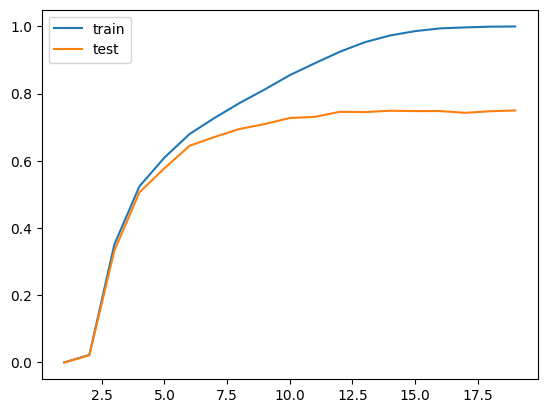

In [34]:
# max_depth
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            'clf__max_depth': np.arange(1,20,1)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_depth'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_depth'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will not use 'max_depth', the score is lower if we define 'max_depth'.
- We will use 'min_samples_split'

params {'clf__min_samples_split': 7}
score 0.7507918230534223


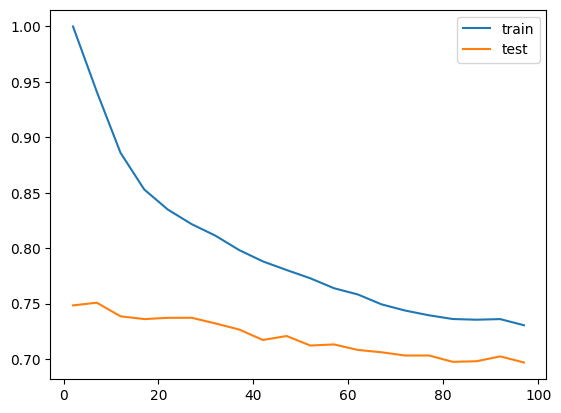

In [35]:
# min_samples_split
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            # 'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': np.arange(2,100,5)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__min_samples_split'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__min_samples_split'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will not use 'max_leaf_nodes'. The score is lower.

params {'clf__max_leaf_nodes': 31, 'clf__min_samples_split': 7}
score 0.636455930909111


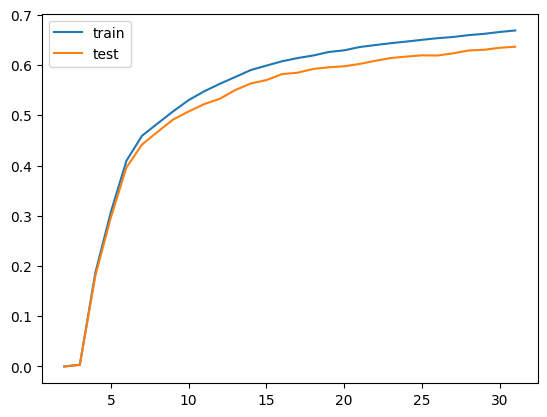

In [36]:
# max_leaf_nodes
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            # 'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': [7],
            'clf__max_leaf_nodes': np.arange(2,32,1)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_leaf_nodes'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_leaf_nodes'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will not use 'min_samples_leaf', the score is the same.

params {'clf__min_samples_leaf': 1, 'clf__min_samples_split': 7}
score 0.7507918230534223


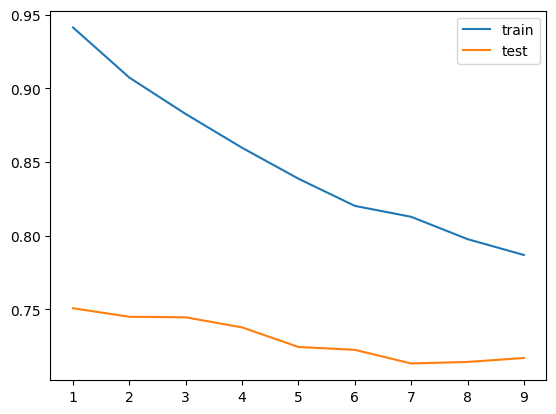

In [37]:
# min_samples_leaf
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            # 'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': [7],
            # 'clf__max_leaf_nodes': np.arange(2,32,1),
            'clf__min_samples_leaf': np.arange(1,10,1)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__min_samples_leaf'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__min_samples_leaf'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will use 'n_estimators'. The score is higher with lower n_estimators.

params {'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.755483971936861


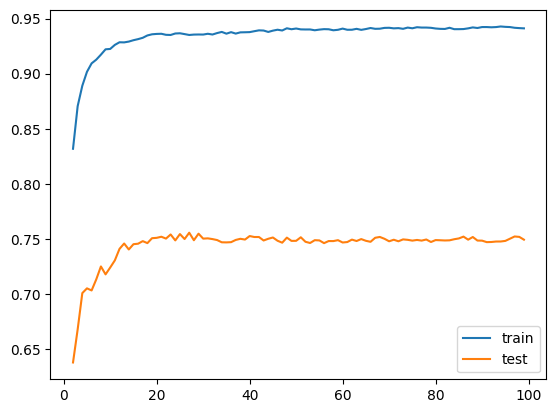

In [38]:
# n_estimators
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            # 'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': [7],
            # 'clf__max_leaf_nodes': np.arange(2,32,1),
            # 'clf__min_samples_leaf': np.arange(1,10,1),
            'clf__n_estimators': np.arange(2,100,1)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__n_estimators'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__n_estimators'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will not use 'max_samples'. The score is the same.

params {'clf__max_samples': 1.0, 'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.755483971936861


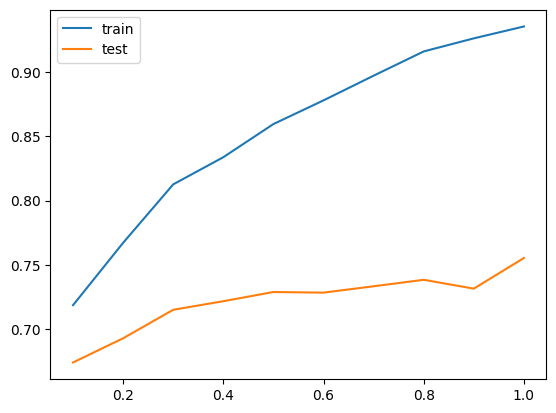

In [39]:
# max_samples
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            # 'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': [7],
            # 'clf__max_leaf_nodes': np.arange(2,32,1),
            # 'clf__min_samples_leaf': np.arange(1,10,1),
            'clf__n_estimators': [27],
            'clf__max_samples': np.arange(0.1,1.1,0.1)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_samples'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_samples'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will use 'max_features'. The score is higher.

params {'clf__max_features': 9, 'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.7696239811565296


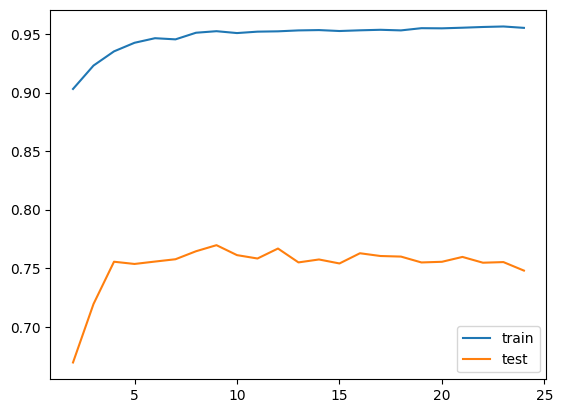

In [40]:
# max_features
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            # 'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': [7],
            # 'clf__max_leaf_nodes': np.arange(2,32,1),
            # 'clf__min_samples_leaf': np.arange(1,10,1),
            'clf__n_estimators': [27],
            # 'clf__max_samples': np.arange(0.1,1.1,0.1),
            'clf__max_features': np.arange(2,25,1)
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_features'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_features'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will use 'max_depth' now. The score is higher.

params {'clf__max_depth': 17, 'clf__max_features': 9, 'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.7722674119204683


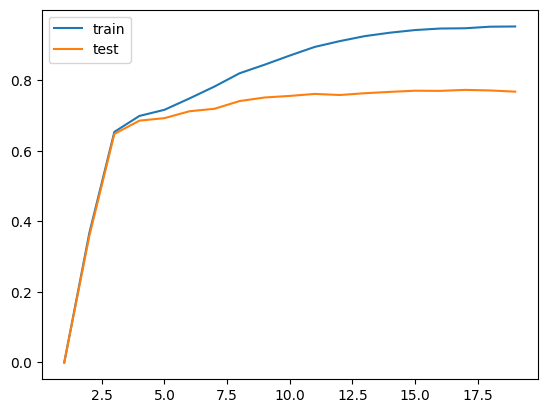

In [41]:
# max_depth 2nd attempt
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            'clf__max_depth': np.arange(1,20,1),
            'clf__min_samples_split': [7],
            # 'clf__max_leaf_nodes': np.arange(2,32,1),
            # 'clf__min_samples_leaf': np.arange(1,10,1),
            'clf__n_estimators': [27],
            # 'clf__max_samples': np.arange(0.1,1.1,0.1),
            'clf__max_features': [9],
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_depth'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_depth'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will not use 'max_leaf_nodes'. The score is lower.

params {'clf__max_depth': 17, 'clf__max_features': 9, 'clf__max_leaf_nodes': 31, 'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.7239295584421964


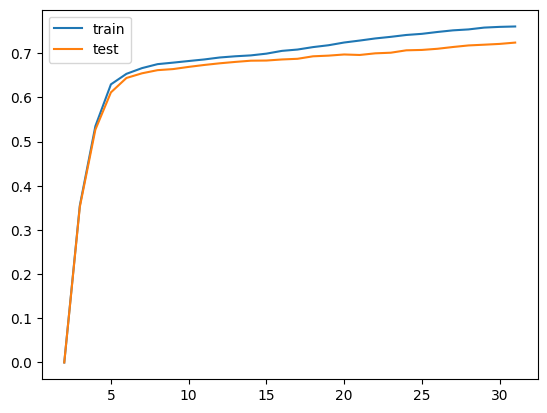

In [42]:
# max_leaf_nodes 2nd attempt
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            'clf__max_depth': [17],
            'clf__min_samples_split': [7],
            'clf__max_leaf_nodes': np.arange(2,32,1),
            # 'clf__min_samples_leaf': np.arange(1,10,1),
            'clf__n_estimators': [27],
            # 'clf__max_samples': np.arange(0.1,1.1,0.1),
            'clf__max_features': [9],
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_leaf_nodes'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_leaf_nodes'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will not use 'min_samples_leaf'. The score is the same.

params {'clf__max_depth': 17, 'clf__max_features': 9, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.7722674119204683


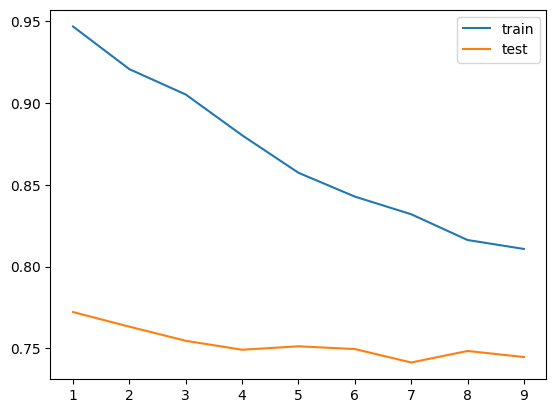

In [43]:
# min_samples_leaf 2nd attempt
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            'clf__max_depth': [17],
            'clf__min_samples_split': [7],
            # 'clf__max_leaf_nodes': np.arange(2,32,1),
            'clf__min_samples_leaf': np.arange(1,10,1),
            'clf__n_estimators': [27],
            # 'clf__max_samples': np.arange(0.1,1.1,0.1),
            'clf__max_features': [9],
        },
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__min_samples_leaf'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__min_samples_leaf'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- The current parameters are overfitted. However, the test score is higher than the good-fit parameters.

We believe the test set to be representative of future unseen data, therefore we will only focus on the test set metrics.

[reference](https://www.quora.com/Should-I-choose-a-more-overfitted-model-but-higher-test-accuracy-than-less-overfitted-model-but-lower-test-accuracy-for-a-deep-neural-network)

params {'clf__max_depth': 17, 'clf__max_features': 9, 'clf__max_leaf_nodes': 31, 'clf__max_samples': 0.9, 'clf__min_samples_leaf': 6, 'clf__min_samples_split': 7, 'clf__n_estimators': 27}
score 0.7247753844073598


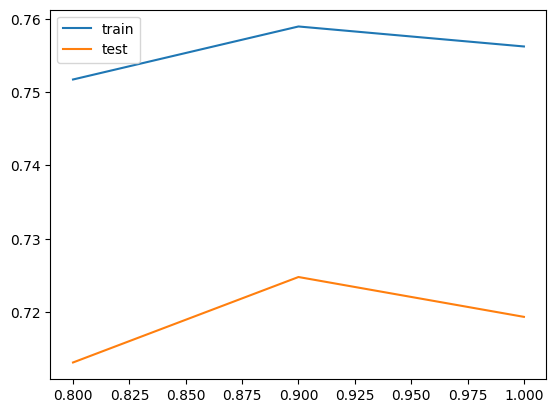

In [44]:
# min_samples_leaf 2nd attempt
def isolate():
    grid = GridSearchCV(
        estimator=rf_pipe,
        scoring=make_scorer(score_func=f1_score, pos_label='Attrited Customer'),
        param_grid={
            'clf__max_depth': [17], 
            'clf__max_features': [9], 
            'clf__max_leaf_nodes': [31], 
            'clf__max_samples': [0.8,0.9,1.0],
            'clf__min_samples_leaf': [6], 
            'clf__min_samples_split': [7],
            'clf__n_estimators': [27]},
        return_train_score=True,
        n_jobs=-1
    )
    grid.fit(X=X_train, y=y_train)

    print("params", grid.best_params_)
    print("score", grid.best_score_)

    sns.lineplot(
        x=grid.cv_results_['param_clf__max_samples'],
        y=grid.cv_results_['mean_train_score'],
        label="train"
    )
    sns.lineplot(
        x=grid.cv_results_['param_clf__max_samples'],
        y=grid.cv_results_['mean_test_score'],
        label="test"
    )

isolate()

- We will use `predict_proba` instead of `predict`. The F1 Score increased.

[reference](https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/)

done
['Attrited Customer' 'Existing Customer']
[0.19598765 0.         0.02413048 ... 0.         0.88220165 0.00618343]
Best Threshold=0.390588, F-Score=0.779


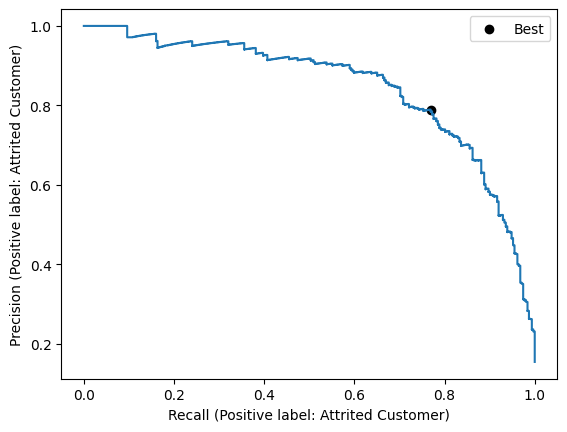

In [45]:
# Model Definition
rf_pipe_tuned = Pipeline(steps=[
    ('composer', composer),
    ('clf', RandomForestClassifier(
        max_depth=17, max_features=9, min_samples_split= 7, n_estimators=27,
        random_state=17
    ))
])

# Model Training
rf_pipe_tuned.fit(X=X_train, y=y_train)
print("done")

# Get best threshold
def isolate():
    print(rf_pipe_tuned.classes_)

    y_test_prob = rf_pipe_tuned.predict_proba(X=X_test)[:,0]
    print(y_test_prob)

    precision, recall, thresholds = precision_recall_curve(
        y_true=y_test, probas_pred=y_test_prob,
        pos_label='Attrited Customer')

    ax = plt.gca()

    disp = PrecisionRecallDisplay(
        precision=precision, recall=recall,
        pos_label='Attrited Customer')
    disp.plot(ax=ax)

    fscore = 2 * (precision * recall) / (precision + recall)
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    
    plt.legend()
    plt.show()

isolate()

In [46]:
# Saving tuned RandomForestClassifier threshold
rf_pipe_tuned_thr = 0.390588

# 9 - Model Saving

In [47]:
# Saving tuned RandomForestClassifier
def isolate():
    with open('./deployment/rf_pipe_tuned.pkl', 'wb') as file_1:
        joblib.dump(rf_pipe_tuned, file_1)
    
    with open('./deployment/rf_pipe_tuned_threshold.txt', 'wt') as file_2:
        json.dump(rf_pipe_tuned_thr, file_2)

isolate()

# 10 - Model Inference

In [48]:
# Load Model
def isolate():
    with open('./deployment/rf_pipe_tuned.pkl', 'rb') as file_1:
        rf_pipe_tuned = joblib.load(file_1)
    
    with open('./deployment/rf_pipe_tuned_threshold.txt', 'rt') as file_2:
        rf_pipe_tuned_thr = json.load(file_2)

    print(rf_pipe_tuned.classes_)

    y_inf_proba = rf_pipe_tuned.predict_proba(X=inf_set)[:,0]

    y_inf_pred = rf_pipe_tuned.predict(X=inf_set)

    y_inf_proba_pred = (y_inf_proba <= rf_pipe_tuned_thr).astype(int)

    display("true", inf_set[target].map({'Attrited Customer': 0, 'Existing Customer': 1}).values)
    display("predict", pd.Series(y_inf_pred).map({'Attrited Customer': 0, 'Existing Customer': 1}).values)
    display("predict_proba", y_inf_proba_pred)

isolate()

['Attrited Customer' 'Existing Customer']


'true'

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

'predict'

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

'predict_proba'

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# 11 - Pengambilan Kesimpulan

- Ordinal feature can be a nominal feature if it contains 'Unknown' category. In this case, we assume that this is the norm in the credit card industry where customer refuses to give some personal information.

- EDA shows that these nominal labels are more likely to be 'Attried Customer':
  1. 'Card_Category' -> 'Gold'
  2. 'Gender' -> 'Female'
  3. 'Education_Level' -> 'Graduate'
  4. 'Marital_Status' -> 'Married'
  5. 'Income_Category' -> 'Less than $40k'

- EDA shows that Log Transformation, Square Root Transformation helps to transform skewed data to be more like a normally distributed data.

  Normally distributed data tends to have smaller standard deviation. Therefore, smaller error.

- Although Decision Tree, Random Forest are not sensitive to multicollinearity (due to how these algorithm choose different features for each decision tree). It will backfire when we increase the `max_features`, because there is higher possibility that the decision tree choose a feature that have strong correlation between features.

- After tuning the algorithm by tweaking the parameters, we can try to tune it one last time using the `predict_proba()` and `sklearn.metrics.precision_recall_curve` to find the best threshold. The downside is that, we can't change the `threshold` within a model. Therefore, we need to make a custom function in the deployment.